0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


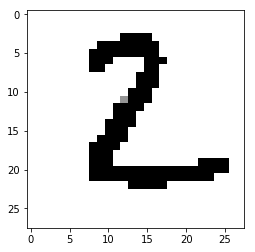

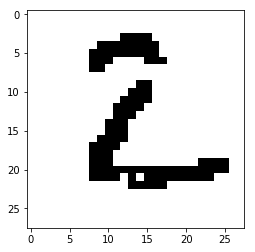

In [1]:
# %load main.py
import numpy as np
import matplotlib.pyplot as plt

import load_MNIST_data
from hf_net import HopfNet

# load data
training_data, validation_data, test_data = load_MNIST_data.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)

# initiate a net
h_net = HopfNet(784)

# form memories
memory_img_count = 60
for i in range(memory_img_count):
    print(i)
    input_sample = training_data[i]
    input_img = input_sample[0]

    input_img[input_img < 0.5] = 0
    input_img[input_img > 0.5] = 1

    h_net.train(input_img)

# retrieve memory
test_in_sample = test_data[1]
test_in_img = test_in_sample[0]

test_in_img[test_in_img < 0.5] = 0
test_in_img[test_in_img > 0.5] = 1

test_out_img = h_net.retrieve(test_in_img)

# show the img
plt.figure(1)
plt.imshow(np.reshape(test_in_img, [28, 28]), cmap='Greys')
plt.show()

#
plt.figure(2)
plt.imshow(np.reshape(test_out_img, [28, 28]), cmap='Greys')
plt.show()

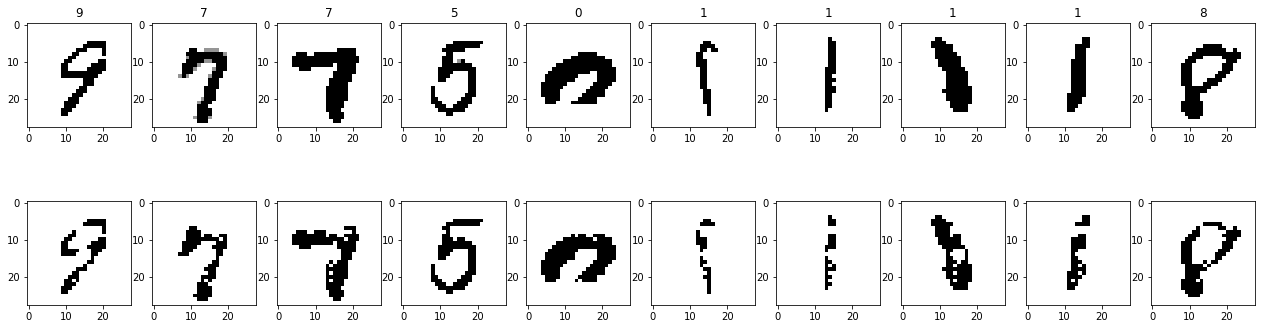

In [45]:
# retrieve memory
plt.clf()
plt.close()
fig, axs = plt.subplots(2,10, figsize=(22, 6), facecolor='w', edgecolor='k')
#fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(10):
    N=np.random.randint(0,10000-10,1)[0]
    test_in_sample = test_data[i+N]
    test_in_img = test_in_sample[0]
    test_in_img[test_in_img < 0.5] = 0
    test_in_img[test_in_img > 0.5] = 1
    test_out_img = h_net.retrieve(test_in_img)
    axs[i].imshow(np.reshape(test_in_img, [28, 28]), cmap='Greys')
    axs[i+10].imshow(np.reshape(test_out_img, [28, 28]), cmap='Greys')
    axs[i].set_title(str(test_in_sample[1]))

# show the img
plt.show()
fig.savefig('result.png')

In [28]:
for i in range(10):
  print (np.asarray(test_data).shape)

(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
(10000, 2)
